In [ ]:
#Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [18]:
#Data Preprocessing 

#Create a function that will return a list of the types of data stored/ Map 
mymap = dict() #empty dictionary 

for column, dtype in dataset.dtypes.items(): #to iterate series
    mymap[str(dtype)] = mymap.get(str(dtype), 0) + 1

print(mymap)

{'int64': 6, 'object': 4, 'float64': 3}


In [38]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

numerical_dataset = numerical_dataset.dropna()  # Removes NaN rows

print(numerical_dataset.isnull().sum())  # See if there are NaNs
numerical_dataset = numerical_dataset.astype(float)
print(numerical_dataset.corr())





Id              0
MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64
                    Id  MSSubClass   LotArea  OverallCond  YearBuilt  \
Id            1.000000    0.011156 -0.033226     0.012609  -0.012713   
MSSubClass    0.011156    1.000000 -0.139781    -0.059316   0.027850   
LotArea      -0.033226   -0.139781  1.000000    -0.005636   0.014228   
OverallCond   0.012609   -0.059316 -0.005636     1.000000  -0.375983   
YearBuilt    -0.012713    0.027850  0.014228    -0.375983   1.000000   
YearRemodAdd -0.021998    0.040581  0.013788     0.073741   0.592855   
BsmtFinSF2   -0.005968   -0.065649  0.111170     0.040229  -0.049107   
TotalBsmtSF  -0.015415   -0.238518  0.260833    -0.171098   0.391452   
SalePrice    -0.021917   -0.084284  0.263843    -0.077856   0.522897   

              YearRemodAdd  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id               -0.021998   -0.005968 

<Axes: >

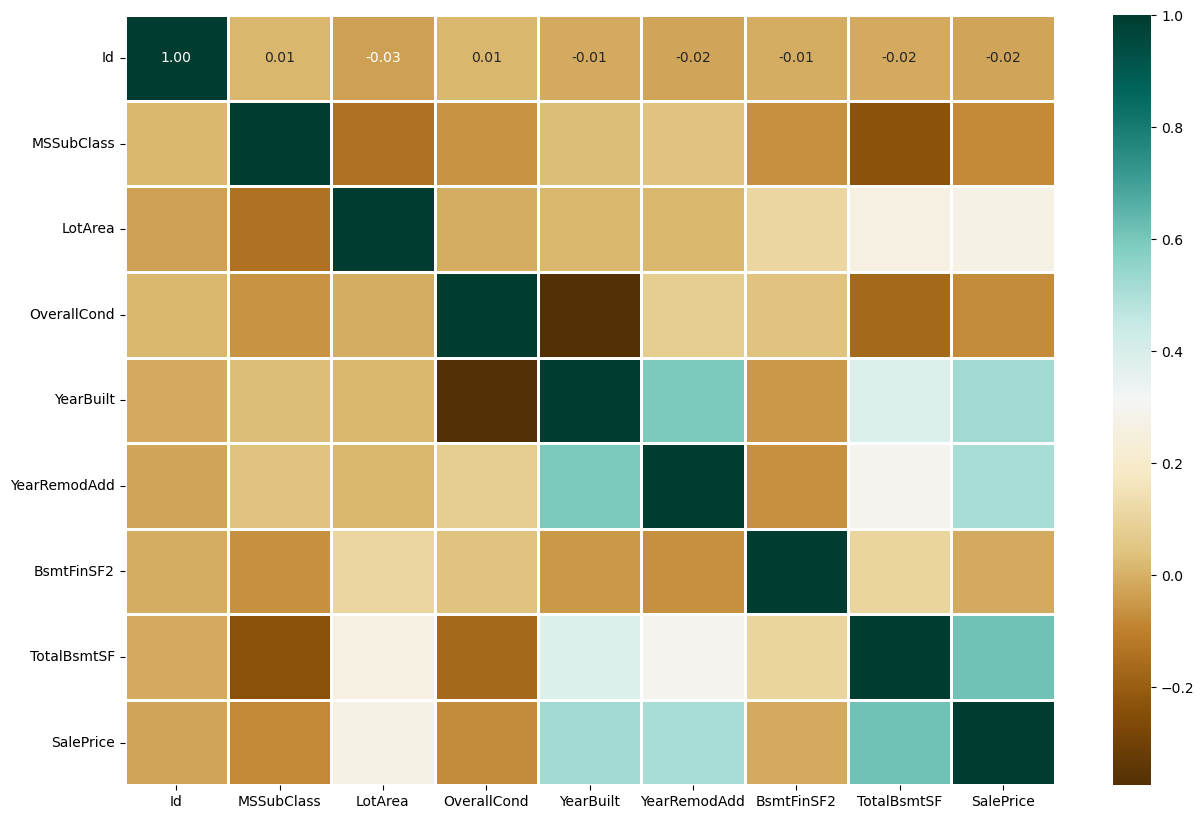

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 1,
            annot = True,
            annot_kws={"size": 10})

